In [1]:
%pip install cx_oracle

Note: you may need to restart the kernel to use updated packages.


In [1]:
import cx_Oracle
dsn = cx_Oracle.makedsn('localhost',1521,'xe')
dsn

'(DESCRIPTION=(ADDRESS=(PROTOCOL=TCP)(HOST=localhost)(PORT=1521))(CONNECT_DATA=(SID=xe)))'

In [2]:
db = cx_Oracle.connect('C##CAKD5','CAKD5',dsn)
db

<cx_Oracle.Connection to C##CAKD5@(DESCRIPTION=(ADDRESS=(PROTOCOL=TCP)(HOST=localhost)(PORT=1521))(CONNECT_DATA=(SID=xe)))>

In [3]:
import pandas as pd
cursor = db.cursor()
cursor.execute('select * from book')
x = cursor.fetchall()
columns = ['BOOKID','BOOKNAME','PUBLISHER','PRICE']

df = pd.DataFrame(x,columns=columns)
df.head()

,BOOKID,BOOKNAME,PUBLISHER,PRICE
0,1,축구의 역사,굿스포츠,7000
1,2,축구아는 여자,나무수,13000
2,3,축구의 이해,대한미디어,22000
3,4,골프 바이블,대한미디어,35000
4,5,피겨 교본,굿스포츠,8000


In [4]:
# create
import cx_Oracle
con = cx_Oracle.connect('C##CAKD5/CAKD5@localhost:1521/xe')
cursor = con.cursor()
sql='create table sample1(id varchar2(10), score number)'
cursor.execute(sql)
cursor.close()
con.commit()
con.close()

In [5]:
# insert
def insert(t):
    con = cx_Oracle.connect('C##CAKD5/CAKD5@localhost:1521/xe')
    cursor = con.cursor()
    sql='insert into sample1 (id,score) values (:1,:2)'
    cursor.execute(sql,t)
    cursor.close()
    con.commit()
    con.close()

insert(('111',80))

In [ ]:
# insert - executemany
def insertmany(t):
    con = cx_Oracle.connect('C##CAKD5/CAKD5@localhost:1521/xe')
    cursor = con.cursor()
    sql='insert into sample1 (id,score) values (:1,:2)'
    cursor.executemany(sql,t)
    cursor.close()
    con.commit()
    con.close()
rows = [('112',90),('113',70),('114',80),('115',85),('116',70)]

insertmany(rows)

In [32]:
# Q. 세개의 속성으로 구분되는 테이블을 생성하고 10개의 데이터를 삽입
con = cx_Oracle.connect('C##CAKD5/CAKD5@localhost:1521/xe')
cursor = con.cursor()
sql='create table sample2(col01 varchar2(10), col02 number, col03 varchar2(10), CONSTRAINT sample_pk PRIMARY KEY (col01))'
cursor.execute(sql)
cursor.close()
con.commit()
con.close()

In [33]:
def insert(t):
    con = cx_Oracle.connect('C##CAKD5/CAKD5@localhost:1521/xe')
    cursor = con.cursor()
    sql='insert into sample2 (col01,col02,col03) values (:1,:2,:3)'
    cursor.execute(sql,t)
    cursor.close()
    con.commit()
    con.close()

def insertmany(t):
    con = cx_Oracle.connect('C##CAKD5/CAKD5@localhost:1521/xe')
    cursor = con.cursor()
    sql='insert into sample2 (col01,col02,col03) values (:1,:2,:3)'
    cursor.executemany(sql,t)
    cursor.close()
    con.commit()
    con.close()

insert(('111',60,'A'))
values = [('112',70,'B'),('113',80,'A'),('114',70,'B'),('115',60,'A')
        ,('116',90,'B'),('117',85,'B'),('118',65,'A'),('119',70,'B'),('120',80,'B')]
insertmany(values)

In [34]:
def updatecol(t):
    con = cx_Oracle.connect('C##CAKD5/CAKD5@localhost:1521/xe')
    cursor = con.cursor()
    sql='update sample2 set col03=:1 where col01=:2'
    cursor.execute(sql,t)
    cursor.close()
    con.commit()
    con.close()
updatecol(('C','111'))


In [35]:
def deletecol(t):
    con = cx_Oracle.connect('C##CAKD5/CAKD5@localhost:1521/xe')
    cursor = con.cursor()
    sql='delete sample2 where col01=:1'
    cursor.execute(sql,t)
    cursor.close()
    con.commit()
    con.close()

deletecol(('111',))

In [45]:
import pandas as pd
con = cx_Oracle.connect('C##CAKD5/CAKD5@localhost:1521/xe')
cursor = con.cursor()
sql='select * from sample2'
cursor.execute(sql)
x = cursor.fetchall()
df_col = pd.DataFrame(x)
cursor.execute("select column_name from user_tab_columns where table_name='SAMPLE2'")
col = cursor.fetchall()
list_py = []
for i in col:
    for j in i:
        list_py.append(j)
df_col.columns = list_py
display(df_col)
cursor.close()
con.close()


,COL01,COL02,COL03
0,112,70,B
1,113,80,A
2,114,70,B
3,115,60,A
4,116,90,B
5,117,85,B
6,118,65,A
7,119,70,B
8,120,80,B


In [47]:
df_col.to_csv('./data/col3.csv')

In [52]:
import csv

with open('./data/col3.csv','r') as csv_file:
    csv_reader = csv.reader(csv_file)
    next(csv_reader) # head 부분을 넘기는 구문
    data = []
    for line in csv_reader:
        data.append((line[1],line[2],line[3]))
data

[('112', '70', 'B'),
 ('113', '80', 'A'),
 ('114', '70', 'B'),
 ('115', '60', 'A'),
 ('116', '90', 'B'),
 ('117', '85', 'B'),
 ('118', '65', 'A'),
 ('119', '70', 'B'),
 ('120', '80', 'B')]

In [53]:
con = cx_Oracle.connect('C##CAKD5/CAKD5@localhost:1521/xe')
cursor = con.cursor()
sql='alter table sample2 drop constraint sample_pk'
cursor.execute(sql)
cursor.close()
con.close()

In [57]:
with open('./data/col3.csv','r') as csv_file:
    csv_reader = csv.reader(csv_file)
    next(csv_reader)
    con = cx_Oracle.connect('C##CAKD5/CAKD5@localhost:1521/xe')
    cursor = con.cursor()
    sql = "insert into sample2 (col01,col02,col03) values(:1,:2,:3)"
    data = []
    for line in csv_reader:
        data.append((line[1],line[2],line[3]))
    cursor.executemany(sql,data)
    cursor.close()
    con.commit()
    con.close()

In [60]:
# 대량 데이터 입력
con = cx_Oracle.connect('C##CAKD5/CAKD5@localhost:1521/xe')
cursor = con.cursor()
sql='create table sample3(id varchar2(10), sales number)'
cursor.execute(sql)
cursor.close()
con.commit()
con.close()

In [63]:
import numpy as np
id = np.arange(0,10000)
sales = np.random.randint(1,100,size = 10000)
df = pd.DataFrame()
df['id']=id
df['sales']= sales
df.head()

,id,sales
0,0,42
1,1,29
2,2,1
3,3,54
4,4,19


In [76]:
con = cx_Oracle.connect('C##CAKD5/CAKD5@localhost:1521/xe')
cursor = con.cursor()
sql='insert into sample3 (id,sales) values (:1,:2)'
id = df.id.to_list()
sales = df.sales.to_list()
data = []
for i,v in zip(id,sales):
    data.append((i,v))
cursor.executemany(sql,data)
cursor.close()
con.commit()
con.close()

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   id      10000 non-null  int32
 1   sales   10000 non-null  int32
dtypes: int32(2)
memory usage: 78.2 KB


In [78]:
df['id'] = df.id.astype('str')

In [80]:
ar = df.values
results = list([tuple(e) for e in ar])
results

[('0', 42),
 ('1', 29),
 ('2', 1),
 ('3', 54),
 ('4', 19),
 ('5', 28),
 ('6', 44),
 ('7', 38),
 ('8', 52),
 ('9', 83),
 ('10', 49),
 ('11', 92),
 ('12', 58),
 ('13', 3),
 ('14', 48),
 ('15', 38),
 ('16', 98),
 ('17', 58),
 ('18', 62),
 ('19', 47),
 ('20', 19),
 ('21', 38),
 ('22', 95),
 ('23', 71),
 ('24', 99),
 ('25', 11),
 ('26', 51),
 ('27', 4),
 ('28', 83),
 ('29', 77),
 ('30', 43),
 ('31', 24),
 ('32', 69),
 ('33', 74),
 ('34', 88),
 ('35', 87),
 ('36', 54),
 ('37', 97),
 ('38', 39),
 ('39', 29),
 ('40', 67),
 ('41', 24),
 ('42', 85),
 ('43', 35),
 ('44', 38),
 ('45', 53),
 ('46', 81),
 ('47', 6),
 ('48', 28),
 ('49', 96),
 ('50', 49),
 ('51', 49),
 ('52', 37),
 ('53', 30),
 ('54', 22),
 ('55', 28),
 ('56', 9),
 ('57', 60),
 ('58', 50),
 ('59', 98),
 ('60', 22),
 ('61', 93),
 ('62', 16),
 ('63', 47),
 ('64', 91),
 ('65', 22),
 ('66', 52),
 ('67', 62),
 ('68', 73),
 ('69', 82),
 ('70', 75),
 ('71', 38),
 ('72', 75),
 ('73', 47),
 ('74', 7),
 ('75', 48),
 ('76', 80),
 ('77', 79),
 (

In [81]:
con = cx_Oracle.connect('C##CAKD5/CAKD5@localhost:1521/xe')
cursor = con.cursor()
sql='insert into sample3 (id,sales) values (:1,:2)'
cursor.executemany(sql,results)
cursor.close()
con.commit()
con.close()

In [86]:
# ID의 자료 타입을 NUMBER로 변경하여 ID 기준으로 오름차순 정렬하세요.
con = cx_Oracle.connect('C##CAKD5/CAKD5@localhost:1521/xe')
cursor = con.cursor()
cursor.execute('truncate table sample3')
cursor.execute('alter table sample3 modify (id number)')
cursor.executemany('insert into sample3 (id,sales) values (:1,:2)',results)
cursor.close()
con.commit()
con.close()

[과제] employees 테이블을 불러와서 다음 사항을 수행하세요.
- 칼럼명을 포함하여 employees 테이블을 데이터프레임으로 출력
- department_id별 평균연봉을 출력
- 부서별 평균 연봉을 수평 그래프로 시각화

In [5]:
import cx_Oracle
import pandas as pd
import matplotlib.pyplot as plt

con = cx_Oracle.connect('C##CAKD5/CAKD5@localhost:1521/xe')
cursor = con.cursor()
sql='select * from employees'
cursor.execute(sql)
x = cursor.fetchall()
df_e = pd.DataFrame(x)
cursor.execute("select column_name from user_tab_columns where table_name='EMPLOYEES'")
col = cursor.fetchall()
list_py = []
for i in col:
    for j in i:
        list_py.append(j)
df_e.columns = list_py
cursor.close()
con.close()
df_e.head()

,EMPLOYEE_ID,FIRST_NAME,LAST_NAME,EMAIL,PHONE_NUMBER,HIRE_DATE,JOB_ID,SALARY,COMMISSION_PCT,MANAGER_ID,DEPARTMENT_ID
0,100,Steven,King,SKING,515.123.4567,2003-06-17,AD_PRES,24000.0,NaN,NaN,90.0
1,101,Neena,Kochhar,NKOCHHAR,515.123.4568,2005-09-21,AD_VP,17000.0,NaN,100.0,90.0
2,102,Lex,De Haan,LDEHAAN,515.123.4569,2001-01-13,AD_VP,17000.0,NaN,100.0,90.0
3,103,Alexander,Hunold,AHUNOLD,590.423.4567,2006-01-03,IT_PROG,9000.0,NaN,102.0,60.0
4,104,Bruce,Ernst,BERNST,590.423.4568,2007-05-21,IT_PROG,6000.0,NaN,103.0,60.0


In [19]:
gd = df_e[['SALARY']].groupby(df_e.DEPARTMENT_ID)
gd.mean()

,SALARY
DEPARTMENT_ID,
10.0,4400.000000
20.0,9500.000000
30.0,4150.000000
40.0,6500.000000
50.0,3475.555556
60.0,5760.000000
70.0,10000.000000
80.0,8955.882353
90.0,19333.333333


<AxesSubplot:ylabel='DEPARTMENT_ID'>

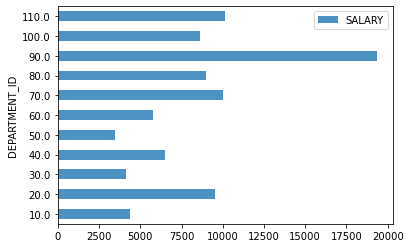

In [22]:
gd.mean().plot(kind='barh', alpha=0.8)

[과제] PURPROD 테이블을 불러와서 다음사항을 수행하세요

- 고객별 2014년 2015년 총 구매액 및 평균구매액 내역
- 고객별 2014 vs 2015 총 구매액 기준 성장율

In [25]:
# 고객별 2014년 2015년 총 구매액 및 평균구매액 내역
import cx_Oracle
import pandas as pd
import matplotlib.pyplot as plt

con = cx_Oracle.connect('LM_PDB/LM@localhost:1521/xepdb1')
cursor = con.cursor()
sql14="select 고객번호,sum(구매금액),round(avg(구매금액)) from purprod where year = '2014' group by 고객번호 order by 고객번호"
sql15="select 고객번호,sum(구매금액),round(avg(구매금액)) from purprod where year = '2015' group by 고객번호 order by 고객번호"
cursor.execute(sql14)
x = cursor.fetchall()
df_pur14 = pd.DataFrame(x)
df_pur14.columns = ['고객번호','총구매액','평균구매액']
cursor.execute(sql15)
x = cursor.fetchall()
df_pur15 = pd.DataFrame(x)
df_pur15.columns = ['고객번호','총구매액','평균구매액']
cursor.close()
con.close()
display(df_pur14.head())
display(df_pur15.head())

,고객번호,총구매액,평균구매액
0,00001,54041667,90979
1,00002,46245330,75812
2,00003,1893769,2563
3,00004,9299616,21040
4,00005,7685880,15160


,고객번호,총구매액,평균구매액
0,00001,31000883,66957
1,00002,53635430,105999
2,00003,1271398,2813
3,00004,7394194,15152
4,00005,5551190,26185


In [39]:
df_pur14_a = df_pur14.set_index('고객번호')
df_pur15_a = df_pur15.set_index('고객번호')
(df_pur15_a.총구매액-df_pur14_a.총구매액)/df_pur14_a.총구매액

고객번호
00001   -0.426352
00002    0.159802
00003   -0.328641
00004   -0.204893
00005   -0.277742
           ...   
19379    2.854009
19380    5.486086
19381         NaN
19382         NaN
19383         NaN
Name: 총구매액, Length: 19383, dtype: float64

In [50]:
# 고객별 2014 vs 2015 총 구매액 기준 성장율
df_grow = pd.DataFrame()
df_grow['성장률'] = round((df_pur15_a.총구매액-df_pur14_a.총구매액)/df_pur14_a.총구매액,3) * 100
df_grow

,성장률
고객번호,
00001,-42.6
00002,16.0
00003,-32.9
00004,-20.5
00005,-27.8
...,...
19379,285.4
19380,548.6
19381,NaN


In [53]:
import csv
with open('./data/purprod.csv','r',encoding='cp949') as csv_file:
    csv_reader = csv.reader(csv_file)
    next(csv_reader)
    data  = csv_reader

In [57]:
df_purprod = pd.read_csv('./data/purprod.csv',encoding='cp949')

In [58]:
df_purprod

,제휴사,영수증번호,대분류코드,중분류코드,소분류코드,고객번호,점포코드,구매일자,구매시간,구매금액,YEAR
0,B,8664000,15,1504,B150401,17218,44,20140222,20,2420,2014
1,B,8664000,16,1601,B160101,17218,44,20140222,20,1070,2014
2,B,8664000,16,1602,B160201,17218,44,20140222,20,8060,2014
3,B,8664000,18,1803,B180301,17218,44,20140222,20,6000,2014
4,B,8664001,5,509,B050901,17674,44,20140222,22,1120,2014
...,...,...,...,...,...,...,...,...,...,...,...
28593025,B,8152449,18,1807,B180707,9559,30,20150104,16,3900,2015
28593026,B,8152449,18,1809,B180901,9559,30,20150104,16,9900,2015
28593027,B,8152449,21,2108,B210802,9559,30,20150104,16,500,2015
28593028,B,8152449,66,6603,B660304,9559,30,20150104,16,8000,2015
